In [1]:
import torch,os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df_resale = pd.read_csv('dataset/resale_price/resale_price_train.csv')
df_resale_test = pd.read_csv('dataset/resale_price/resale_price_test.csv')
df_resale_arma_pre = pd.read_csv('statistical_models/data/resale_price_log_diff_arma_pred.csv')

In [3]:
df_resale_Bukit_Timah_test = df_resale_test[df_resale_test.town=='BUKIT TIMAH']
df_resale_Bukit_Timah_test

,town,month,resale_price,price_diff,price_log,price_log_diff
120,BUKIT TIMAH,2023-01-01,764500.0,-192260.0,13.546977,-0.224331
121,BUKIT TIMAH,2023-02-01,681444.0,-83056.0,13.431969,-0.115008
122,BUKIT TIMAH,2023-03-01,744500.0,63056.0,13.520468,0.088499
123,BUKIT TIMAH,2023-04-01,674500.0,-70000.0,13.421727,-0.098741
124,BUKIT TIMAH,2023-05-01,742778.0,68278.0,13.518152,0.096426
125,BUKIT TIMAH,2023-06-01,707500.0,-35278.0,13.469493,-0.048660
126,BUKIT TIMAH,2023-07-01,1016000.0,308500.0,13.831384,0.361891
127,BUKIT TIMAH,2023-08-01,957000.0,-59000.0,13.771559,-0.059825
128,BUKIT TIMAH,2023-09-01,987167.0,30167.0,13.802595,0.031036
129,BUKIT TIMAH,2023-10-01,796661.0,-190506.0,13.588185,-0.214410


In [4]:
df_resale_Bukit_Timah = df_resale[df_resale.town=='BUKIT TIMAH']
df_resale_Bukit_Timah

,town,month,resale_price,price_diff,price_log,price_log_diff
1650,BUKIT TIMAH,2000/2/1,376857,22028,12.839621,0.060230
1651,BUKIT TIMAH,2000/3/1,298257,-78600,12.605711,-0.233910
1652,BUKIT TIMAH,2000/4/1,391385,93128,12.877447,0.271736
1653,BUKIT TIMAH,2000/5/1,377929,-13456,12.842462,-0.034985
1654,BUKIT TIMAH,2000/6/1,388875,10946,12.871013,0.028552
...,...,...,...,...,...,...
1916,BUKIT TIMAH,2022/8/1,545250,-139333,13.209000,-0.227565
1917,BUKIT TIMAH,2022/9/1,777413,232163,13.563727,0.354727
1918,BUKIT TIMAH,2022/10/1,825315,47902,13.623520,0.059793
1919,BUKIT TIMAH,2022/11/1,789600,-35715,13.579282,-0.044239


# ARMA predictions

In [5]:
initial_resale_log = df_resale_Bukit_Timah["price_log"].iloc[-1]

# 使用 income_log_diff 计算还原的 income_log
resale_log = [initial_resale_log]
for diff in df_resale_arma_pre.to_numpy():
    new_log = resale_log[-1] + diff[0]
    resale_log.append(new_log)


resale_log = np.array(resale_log)
resale_arma = np.exp(resale_log)[1:]

resale_arma

array([780996.17235056, 776321.33823047, 789216.45084197, 785329.98674439,
       797563.65317037, 794404.84035838, 806036.18706981, 803549.37734775,
       814632.69625397, 812766.8928827 , 823352.04108762, 822060.5144482 ,
       832193.28102339, 831433.21613716, 841155.65863182, 840887.83188782,
       850238.58507107, 850427.06773383, 859441.62685935, 860053.51313328])

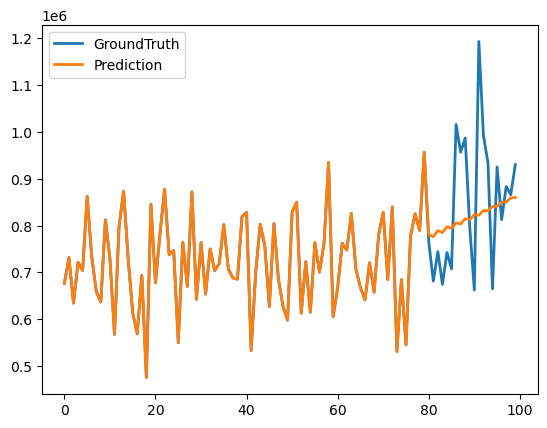

In [6]:
#visulization
true = np.concatenate([df_resale_Bukit_Timah.iloc[:,2].values, df_resale_Bukit_Timah_test.iloc[:,2].values], axis=0)
preds = np.concatenate([df_resale_Bukit_Timah.iloc[:,2].values, resale_arma], axis=0)


plt.figure()
plt.plot(true[-100:], label='GroundTruth', linewidth=2)
plt.plot(preds[-100:], label='Prediction', linewidth=2)
plt.legend()

In [7]:
#RMSE
np.sqrt(np.mean((df_resale_Bukit_Timah_test.iloc[:,2].values-resale_arma)**2))

137376.4958876518

In [8]:
#MAPE
np.mean(np.abs((df_resale_Bukit_Timah_test.iloc[:,2].values-resale_arma) / df_resale_Bukit_Timah_test.iloc[:,2].values),axis=0)

0.12461980061601789

# VAR

## Bukit Timah

In [9]:
df_resale_var_pre = pd.read_csv('statistical_models/data/resale_price_log_diff_var_pred_bt.csv')
df_resale_town_test = df_resale_test[df_resale_test.town=='BUKIT TIMAH']
df_resale_town = df_resale[df_resale.town=='BUKIT TIMAH']
initial_resale_log = df_resale_town["price_log"].iloc[-1]

# 使用 income_log_diff 计算还原的 income_log
resale_log = [initial_resale_log]
for diff in df_resale_var_pre.to_numpy():
    new_log = resale_log[-1] + diff[0]
    resale_log.append(new_log)

resale_log = np.array(resale_log)
resale_var = np.exp(resale_log)[1:]


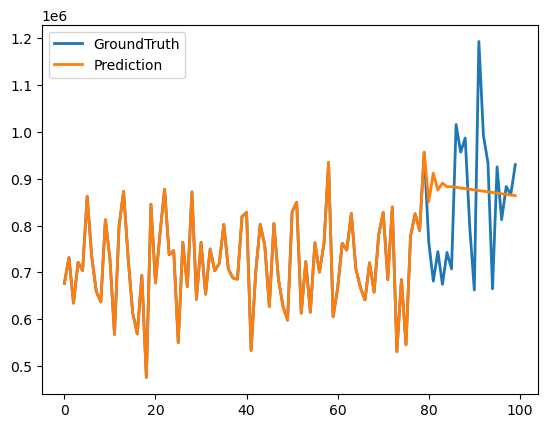

In [10]:
#visulization
preds = np.concatenate([df_resale_town.iloc[:,2].values, resale_var], axis=0)
true = np.concatenate([df_resale_town.iloc[:,2].values, df_resale_town_test.iloc[:,2].values], axis=0)
plt.figure()
plt.plot(true[-100:], label='GroundTruth', linewidth=2)
plt.plot(preds[-100:], label='Prediction', linewidth=2)
plt.legend()

In [11]:
#RMSE
np.sqrt(np.mean((df_resale_town_test.iloc[:,2].values-resale_var)**2))

147595.59967536075

In [12]:
#MAPE
np.mean(np.abs((df_resale_town_test.iloc[:,2].values-resale_var) / df_resale_town_test.iloc[:,2].values),axis=0)

0.1557035080481257

## Yishun

In [13]:
df_resale_var_pre = pd.read_csv('statistical_models/data/resale_price_log_diff_var_pred_ys.csv')
df_resale_town_test = df_resale_test[df_resale_test.town=='YISHUN']
df_resale_town = df_resale[df_resale.town=='YISHUN']
initial_resale_log = df_resale_town["price_log"].iloc[-1]

# 使用 income_log_diff 计算还原的 income_log
resale_log = [initial_resale_log]
for diff in df_resale_var_pre.to_numpy():
    new_log = resale_log[-1] + diff[0]
    resale_log.append(new_log)

resale_log = np.array(resale_log)
resale_var = np.exp(resale_log)[1:]

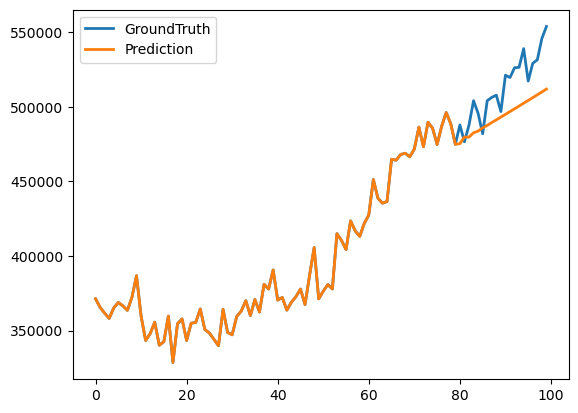

In [14]:
#visulization
preds = np.concatenate([df_resale_town.iloc[:,2].values, resale_var], axis=0)
true = np.concatenate([df_resale_town.iloc[:,2].values, df_resale_town_test.iloc[:,2].values], axis=0)
plt.figure()
plt.plot(true[-100:], label='GroundTruth', linewidth=2)
plt.plot(preds[-100:], label='Prediction', linewidth=2)
plt.legend()

In [15]:
#RMSE
np.sqrt(np.mean((df_resale_town_test.iloc[:,2].values-resale_var)**2))

22343.127857050902

In [16]:
#MAPE
np.mean(np.abs((df_resale_town_test.iloc[:,2].values-resale_var) / df_resale_town_test.iloc[:,2].values),axis=0)

0.037416919655554035

## Woodlands

In [17]:
df_resale_var_pre = pd.read_csv('statistical_models/data/resale_price_log_diff_var_pred_wl.csv')
df_resale_town_test = df_resale_test[df_resale_test.town=='WOODLANDS']
df_resale_town = df_resale[df_resale.town=='WOODLANDS']
initial_resale_log = df_resale_town["price_log"].iloc[-1]

# 使用 income_log_diff 计算还原的 income_log
resale_log = [initial_resale_log]
for diff in df_resale_var_pre.to_numpy():
    new_log = resale_log[-1] + diff[0]
    resale_log.append(new_log)

resale_log = np.array(resale_log)
resale_var = np.exp(resale_log)[1:]

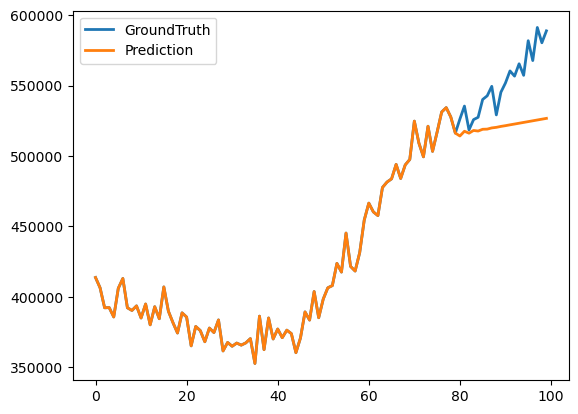

In [18]:
#visulization
preds = np.concatenate([df_resale_town.iloc[:,2].values, resale_var], axis=0)
true = np.concatenate([df_resale_town.iloc[:,2].values, df_resale_town_test.iloc[:,2].values], axis=0)
plt.figure()
plt.plot(true[-100:], label='GroundTruth', linewidth=2)
plt.plot(preds[-100:], label='Prediction', linewidth=2)
plt.legend()

In [19]:
#RMSE
np.sqrt(np.mean((df_resale_town_test.iloc[:,2].values-resale_var)**2))

35962.39536428391

In [20]:
#MAPE
np.mean(np.abs((df_resale_town_test.iloc[:,2].values-resale_var) / df_resale_town_test.iloc[:,2].values),axis=0)

0.05473705981723417

## Toa Payoh

In [21]:
df_resale_var_pre = pd.read_csv('statistical_models/data/resale_price_log_diff_var_pred_tp.csv')
df_resale_town_test = df_resale_test[df_resale_test.town=='TOA PAYOH']
df_resale_town = df_resale[df_resale.town=='TOA PAYOH']
initial_resale_log = df_resale_town["price_log"].iloc[-1]

# 使用 income_log_diff 计算还原的 income_log
resale_log = [initial_resale_log]
for diff in df_resale_var_pre.to_numpy():
    new_log = resale_log[-1] + diff[0]
    resale_log.append(new_log)

resale_log = np.array(resale_log)
resale_var = np.exp(resale_log)[1:]

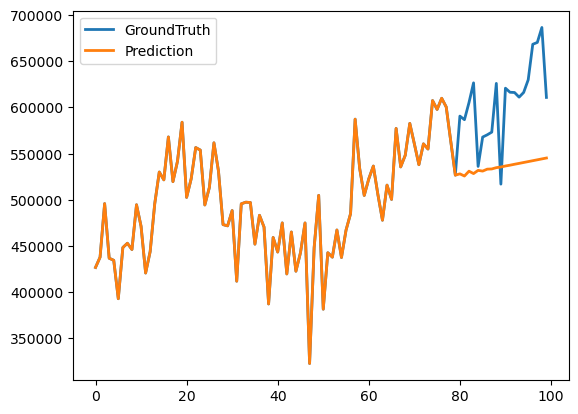

In [22]:
#visulization
preds = np.concatenate([df_resale_town.iloc[:,2].values, resale_var], axis=0)
true = np.concatenate([df_resale_town.iloc[:,2].values, df_resale_town_test.iloc[:,2].values], axis=0)
plt.figure()
plt.plot(true[-100:], label='GroundTruth', linewidth=2)
plt.plot(preds[-100:], label='Prediction', linewidth=2)
plt.legend()

In [23]:
#RMSE
np.sqrt(np.mean((df_resale_town_test.iloc[:,2].values-resale_var)**2))

80790.1135477966

In [24]:
#MAPE
np.mean(np.abs((df_resale_town_test.iloc[:,2].values-resale_var) / df_resale_town_test.iloc[:,2].values),axis=0)

0.11713558639797517